In [17]:
import numpy as np
import pandas as pd
import taurus_functions as tau
import matplotlib.pyplot as plt


In [19]:
##THIS block reads, cleans the raw data and then calculates the numbers of interes

##here's the data, read it in
datadir = 'datastorage/'
dfile = 'GDR2_TAUAUR_cleaned.csv'
data = pd.read_csv(datadir + dfile)

clean_dfile = tau.clean_gaia_data(data,'dummy.csv')
print(clean_dfile)
##can comment the above out once you have run them and use the following line
#clean_dfile = 'datastorage/dummy_20180822-12:04:02csv'

##now read the clean file
cdata = pd.read_csv(clean_dfile,sep=',') 

##now compute things like absolute mags and errors:
G,BP,RP,sig_G,sig_BP,sig_RP,sourceID = tau.produce_data_gaia(cdata)


Removing 0 entries with NaNs in key data
Removing 375 entries with bad photometry/parallax
datastorage/dummy_20180828-11:01:39.csv


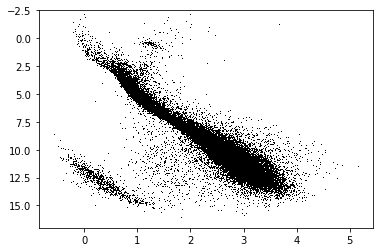

In [20]:
##A quick plot of a HR diagram of the data, looks fine to me.

plt.plot(BP-RP,G,'k,')
plt.ylim([17,-2.5])
plt.show()

In [28]:
##now generate a random sample from a model (not including metallicity this time)
##only 100000 for now as a test
modfile = 'isochrones/parsec1.2_z_solar_stacked.pkl'
sample_2d = tau.sample_generate_2d(nsamples=50000,regen=True,use_mini=True,outfilename = 'isochrones/fullsamp_mini.pkl',readfile='isochrones/tmp1_dummy.pkl',modelfile=modfile,agelims=[1.0,3000.0],masslims=[0.1,1.0])
##try loading it instead of regening
#sample_2d = tau.sample_generate_2d(nsamples=100000,regen=False,outfilename = None,readfile='isochrones/fullsamp_mini.pkl',modelfile=None,agelims=[1.0,3000.0],masslims=[0.1,1.0])
 


Generating Samples
up to 10000 out of 50000
up to 20000 out of 50000
up to 30000 out of 50000
up to 40000 out of 50000
up to 50000 out of 50000
outputting samples to isochrones/fullsamp_mini.pkl and returning the samples to user


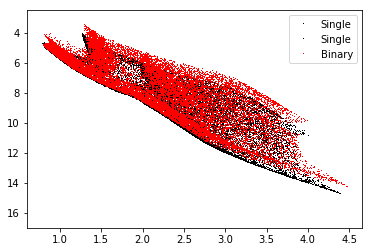

In [30]:
##plot the sample stars, color-coding the binaries 
##What's the wierd stuff at G=30-35?? I think it's caused by dead stars that have small masses and so the interpolation
##fials. Solution is to interpolated on Mini (initial mass in the models), then save the real mass corresponding to 
##that (Mass in the models). ACR fixed this in taurus_functions.py
binbin = np.where(sample_2d[:,5] > 0)[0]

plt.plot(sample_2d[:,3]-sample_2d[:,4],sample_2d[:,2],'k,',label='Single')
plt.plot(sample_2d[binbin,3]-sample_2d[binbin,4],sample_2d[binbin,2],'r,',label='Binary')
plt.ylim([17,2.5])
plt.legend()
plt.show()

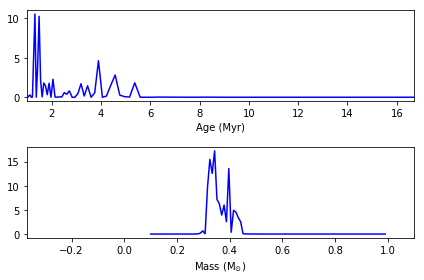

In [31]:
##now probabilities for one star, note the option to show the user histograms if switched on.
##Run test on HP Tau G3
ttt = np.where(sourceID == 145213192171160064)[0] ##HPTau G3 
prob_data_model,age,mass,sig_age,sig_mass = tau.probability_calculation_singlestar(sample_2d,G[ttt[0]],BP[ttt[0]],RP[ttt[0]],sig_G[ttt[0]],sig_BP[ttt[0]],sig_RP[ttt[0]],sourceID[ttt[0]],run_2mass=False,showhist=True)



In [32]:
##how about running hings on a few stars ##HP Tau G3 and FF Tau
torun = np.where((sourceID == 145213192171160064) | (sourceID == 145213875069914496) )[0]
age2,mass2,sig_age2,sig_mass2 = tau.probability_calculation_all(sample_2d,G[torun],BP[torun],RP[torun],sig_G[torun],sig_BP[torun],sig_RP[torun],sourceID[torun],run_2mass=False)
print('HP Tau G3 and FF Tau')
print('AGE')
print(age2)
print('MASS')
print(mass2)
print('Age Errors')
print(sig_age2)
print('Mass Errors')
print(sig_mass2)


Up to 2 out of 2 stars
Will finish at 2018-08-28 11:07:25
HP Tau G3 and FF Tau
AGE
[ 2.01503691  1.73463863]
MASS
[ 0.36552288  0.42436901]
Age Errors
[ 0.2937703   0.43093234]
Mass Errors
[ 0.0367475   0.04429165]
